In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_variables_objetivo.csv'
filename_val = 'data_variables_objetivo_2025.csv'

# Importar el CSV y usar 'date_index' como índice
df_final = pd.read_csv(filename, index_col='date_index', parse_dates=True)
df_val = pd.read_csv(filename_val, index_col='date_index', parse_dates=True)
# Mostrar el DataFrame
df_final

C:\Users\Cris2\AppData\Local\Temp\ipykernel_16628\1500250873.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final = pd.read_csv(filename, index_col='date_index', parse_dates=True)
C:\Users\Cris2\AppData\Local\Temp\ipykernel_16628\1500250873.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_val = pd.read_csv(filename_val, index_col='date_index', parse_dates=True)


,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,...,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
date_index,,,,,,,,,,,,,,,,,,,,,
2024-02-29_1,12.00,1870.12000,1.489899,554.450003,1.787380,2.539822,6.651545,0.052983,25.998239,11450.710542,...,31.573014,36.183300,11450.710542,40.443694,10.572196,806.072461,48.654884,2.483118,733.375209,35.469623
2024-02-29_2,12.00,1981.41000,1.374489,520.910001,1.562654,2.700090,6.501437,0.051864,27.259331,12263.137734,...,28.794196,43.730550,12263.137734,40.768495,9.468304,850.078887,47.254636,2.486513,733.517849,35.470768
2024-03-05_2,12.00,2042.20000,1.532252,429.360003,1.490524,1.206539,6.347318,0.029099,34.476166,11086.858835,...,27.702675,12.425673,11086.858835,44.228965,9.892167,1055.338111,55.582635,2.538662,732.518910,34.861769
2024-04-01_1,12.00,1695.95860,1.122470,484.280000,1.587753,2.170090,6.221565,0.028911,21.868197,13544.810526,...,24.862048,29.999268,13544.810526,51.022564,7.643118,1174.511108,44.453878,2.969184,479.251010,35.176815
2024-04-01_2,12.00,2040.98324,1.303581,641.419998,1.758218,1.933470,6.767330,0.034819,22.213015,14817.123206,...,33.649676,26.858065,14817.123206,45.498438,10.171749,1238.088423,50.254570,2.443726,612.253563,31.747002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29_2,12.00,1936.16000,1.028478,448.900001,1.764307,2.418213,7.755989,0.064950,18.744464,9667.431613,...,29.106942,33.526136,9667.431613,41.406955,16.414448,637.445526,54.435916,1.576910,684.767460,38.685386
2024-12-30_1,12.00,1817.84000,0.959434,447.020004,2.025931,3.201476,7.381677,0.049988,12.265414,6911.827347,...,33.566742,41.117567,6911.827347,33.544360,11.349742,505.116556,46.074137,1.399953,364.807686,40.367068
2024-12-30_2,11.95,2152.98000,1.120663,497.169998,1.932478,5.092523,7.003547,0.057837,13.009007,7064.308384,...,38.135655,89.104807,7064.308384,29.643167,11.347121,450.651244,44.640252,1.770180,354.333683,35.479087


In [391]:
columnas_objetivo = [
    'au_recuperacion', 'ag_recuperacion', 'pb_recuperacion', 'zn_recuperacion', 'fe_recuperacion',
    'au_contenido', 'ag_contenido', 'pb_contenido', 'zn_contenido',
    'ag_concentrado_pb_ley', 'pb_concentrado_pb_ley', 'zn_concentrado_pb_ley',
    'ag_concentrado_zn_ley', 'zn_concentrado_zn_ley',
    'au_concentrado_fe_ley', 'ag_concentrado_fe_ley', 'fe_concentrado_fe_ley'
]

columna= 'au_recuperacion'

# 3. Crear lista de columnas a ELIMINAR (todas las objetivo menos la que se conserva)
columnas_a_eliminar = [col for col in columnas_objetivo if col != columna]

# 4. Seleccionar todas las columnas del DataFrame original, excepto 'columnas_a_eliminar'
df_filtrado = df_final.drop(columns=columnas_a_eliminar)

In [393]:
# Calcular correlación con au_recuperacion
correlation = df_filtrado.corr()[columna].abs().sort_values(ascending=False)
print(correlation)

# Seleccionar las mejores características (Ejemplo: >0.3 de correlación)
selected_features = correlation[correlation > 0.35].index.tolist()
selected_features.remove(columna)  # Eliminamos la variable objetivo

print("Características seleccionadas:", selected_features)

au_recuperacion      1.000000
au_concentrado_fe    0.642248
au_colas_fe          0.506919
ag_concentrado_fe    0.398585
ag_colas_fe          0.397629
ag_colas_zn          0.382593
au_cabeza            0.377620
fe_concentrado_fe    0.370748
ag_cabeza            0.359887
pb_concentrado_pb    0.293050
pb_cabeza            0.286998
cu_concentrado_fe    0.281802
fe_colas_fe          0.261806
cu_colas_zn          0.223537
pb_colas_zn          0.223093
fe_concentrado_pb    0.206778
fe_cabeza            0.205318
zn_cabeza            0.199635
fe_colas_pb          0.196033
cu_concentrado_pb    0.192697
fe_concentrado_zn    0.184015
au_colas_zn          0.176767
zn_colas_zn          0.174476
au_concentrado_zn    0.165663
zn_colas_pb          0.155050
pb_concentrado_fe    0.154101
zn_concentrado_fe    0.139776
pb_colas_fe          0.126799
au_colas_pb          0.118074
cu_colas_pb          0.102626
cu_cabeza            0.099805
zn_concentrado_pb    0.097287
zn_colas_fe          0.089070
pb_concent

In [395]:
df_filtrado[selected_features]

,au_concentrado_fe,au_colas_fe,ag_concentrado_fe,ag_colas_fe,ag_colas_zn,au_cabeza,fe_concentrado_fe,ag_cabeza
date_index,,,,,,,,
2024-02-29_1,0.408067,0.360957,51.243278,51.248589,733.375209,1.489899,6.423375,554.450003
2024-02-29_2,0.387807,0.360957,51.242884,51.248589,733.517849,1.374489,6.349625,520.910001
2024-03-05_2,0.383104,0.360957,51.248537,51.248589,732.518910,1.532252,4.968999,429.360003
2024-04-01_1,0.256264,0.270000,19.239886,19.240000,479.251010,1.122470,3.739628,484.280000
2024-04-01_2,0.382488,0.390000,46.479982,46.480000,612.253563,1.303581,5.163037,641.419998
...,...,...,...,...,...,...,...,...
2024-12-29_2,0.372059,0.330000,97.720009,97.720000,684.767460,1.028478,8.402382,448.900001
2024-12-30_1,0.273808,0.270000,46.749122,46.760000,364.807686,0.959434,7.032032,447.020004
2024-12-30_2,0.316645,0.270000,43.928355,43.920000,354.333683,1.120663,6.694182,497.169998


In [421]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [423]:
def seleccionar_caracteristicas_importantes(df, columna_objetivo, umbral=0.5):
    correlation = df.corr()[columna_objetivo].abs().sort_values(ascending=False)
    selected_features = correlation[correlation > umbral].index.tolist()
    if columna_objetivo in selected_features:
        selected_features.remove(columna_objetivo)
    return selected_features


In [425]:
def crear_dataset_ventana_serie(df, columna, ventana=5):
    X, y = [], []
    for i in range(ventana, len(df)):
        X.append(df[columna].iloc[i-ventana:i].values)
        y.append(df[columna].iloc[i])
    return np.array(X), np.array(y)

In [427]:
def predecir_futuro_feature(df, columna, ventana=5, horizonte=115):
    X, y = crear_dataset_ventana_serie(df, columna, ventana)
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X, y)

    ultimos = df[columna].iloc[-ventana:].values.tolist()
    predicciones = []
    for _ in range(horizonte):
        entrada = np.array(ultimos[-ventana:]).reshape(1, -1)
        pred = modelo.predict(entrada)[0]
        predicciones.append(pred)
        ultimos.append(pred)
    return predicciones

In [438]:
def pipeline_sarimax(df, columna_objetivo, ventana=5, horizonte=115, umbral_corr=0.5, arima_order=(1,0,1)):
    df = df.copy()
    
    # 1. Seleccionar características importantes
    selected_features = seleccionar_caracteristicas_importantes(df, columna_objetivo, umbral_corr)
    print("📌 Características seleccionadas:", selected_features)

    # 2. Predecir futuras Xs seleccionadas
    predicciones_X = {}
    for feature in selected_features:
        print(f"⏳ Prediciendo '{feature}' a futuro...")
        pred = predecir_futuro_feature(df, feature, ventana, horizonte)
        predicciones_X[feature] = pred

    # 3. Escalar variables X
    X_features = df[selected_features]
    y = df[columna_objetivo]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features)
    X_scaled = pd.DataFrame(X_scaled, columns=selected_features, index=X_features.index)

    # Dividir en entrenamiento y prueba
    train_size = int(len(df) * 0.8)
    X_train, X_test = X_scaled.iloc[:train_size], X_scaled.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # 4. Entrenar modelo SARIMAX con exógenas
    print("⚙️ Entrenando modelo SARIMAX...")
    model = SARIMAX(y_train, exog=X_train, order=arima_order)
    result = model.fit(disp=False)
    print(result.summary())

    # 5. Crear dataset de predicciones futuras de X y escalar
    df_pred_futuro = pd.DataFrame(predicciones_X)
    df_pred_futuro_scaled = pd.DataFrame(scaler.transform(df_pred_futuro), columns=selected_features)

    print(df_pred_futuro_scaled.shape)

    # 6. Predecir Y futura usando SARIMAX con X futuras
    print(f"📈 Generando predicciones futuras de '{columna_objetivo}' usando SARIMAX...")
    y_futuro = result.predict(start=len(y_train), end=len(y_train) + horizonte - 1, exog=df_pred_futuro_scaled)

    # Combinar todo en un dataframe final
    df_resultado = df_pred_futuro.copy()
    df_resultado[columna_objetivo + '_pred'] = y_futuro.values

    return df_resultado, result

📌 Características seleccionadas: ['ag_recuperacion', 'au_contenido', 'au_concentrado_fe', 'fe_recuperacion', 'au_colas_fe']
⏳ Prediciendo 'ag_recuperacion' a futuro...
⏳ Prediciendo 'au_contenido' a futuro...
⏳ Prediciendo 'au_concentrado_fe' a futuro...
⏳ Prediciendo 'fe_recuperacion' a futuro...
⏳ Prediciendo 'au_colas_fe' a futuro...
⚙️ Entrenando modelo SARIMAX...


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        au_recuperacion   No. Observations:                  337
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -664.817
Date:                Mon, 07 Apr 2025   AIC                           1345.633
Time:                        21:12:31   BIC                           1376.194
Sample:                             0   HQIC                          1357.814
                                - 337                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ag_recuperacion       0.9885      0.148      6.685      0.000       0.699       1.278
au_contenido          4.1111      0.086     47.898      0.000       3.943       4.279
au_concentrado_fe    -4.

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: title={'center': 'Predicción de au_recuperacion'}>

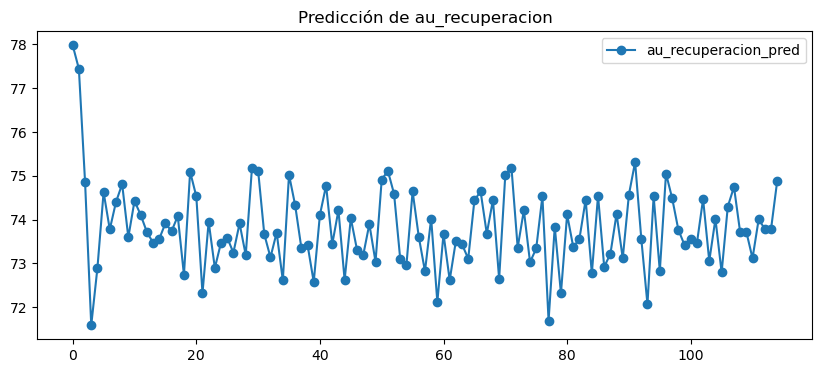

In [440]:
df_resultado, modelo_final = pipeline_sarimax(
    df=df_final,
    columna_objetivo='au_recuperacion',
    ventana=5,
    horizonte=115,
    umbral_corr=0.5,
    arima_order=(1,0,1)
)

# Visualizar predicción
df_resultado[['au_recuperacion_pred']].plot(title='Predicción de au_recuperacion', marker='o', figsize=(10,4))

## Prophet

In [264]:
df_prop = df_final[[columna]]

In [266]:
df_prop

,au_recuperacion
date_index,
2024-02-29_1,74.736343
2024-02-29_2,73.987149
2024-03-05_2,77.089547
2024-04-01_1,80.245746
2024-04-01_2,73.968376
...,...
2024-12-29_2,65.460849
2024-12-30_1,74.421502
2024-12-30_2,75.692150


In [268]:
# Resetear el índice y renombrar
df_prop = df_prop.reset_index().rename(columns={'index': 'date_index'})

# Convertir índice a string y separarlo en fecha y turno
df_prop[['fecha', 'turno']] = df_prop['date_index'].astype(str).str.split('_', expand=True)

# Mapear el turno a hora
df_prop['hora_turno'] = df_prop['turno'].map({'1': '08:00:00', '2': '20:00:00'})

# Construir columna ds para Prophet
df_prop['ds'] = pd.to_datetime(df_prop['fecha'] + ' ' + df_prop['hora_turno'])

# Asignar la variable objetivo a y
df_prop['y'] = df_prop[columna]

# Dejar solo lo necesario para Prophet
df_prophet = df_prop[['ds', 'y']]

In [270]:
df_prophet = df_prop[['ds', 'y']].copy()

In [272]:
df_prophet

,ds,y
0,2024-02-29 08:00:00,74.736343
1,2024-02-29 20:00:00,73.987149
2,2024-03-05 20:00:00,77.089547
3,2024-04-01 08:00:00,80.245746
4,2024-04-01 20:00:00,73.968376
...,...,...
417,2024-12-29 20:00:00,65.460849
418,2024-12-30 08:00:00,74.421502
419,2024-12-30 20:00:00,75.692150
420,2024-12-31 08:00:00,74.516972


In [274]:
# Paso 1: dividir 80% train, 20% test
n_total = len(df_prophet)
n_train = int(n_total * 0.8)
n_test = n_total - n_train

df_train = df_prophet.iloc[:n_train]
df_test = df_prophet.iloc[n_train:]

In [276]:
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)

20:28:20 - cmdstanpy - INFO - Chain [1] start processing
20:28:20 - cmdstanpy - INFO - Chain [1] done processing


In [278]:
# Paso 3: crear fechas futuras para los puntos de prueba
future = model.make_future_dataframe(periods=n_test, freq='12h')
forecast = model.predict(future)

In [280]:
# Paso 4: unir predicciones con los datos reales del test
forecast_test = forecast[['ds', 'yhat']].set_index('ds')
df_test_eval = df_test.set_index('ds').join(forecast_test, how='left')

In [282]:
# Paso 5: calcular métricas
y_true = df_test_eval['y']
y_pred = df_test_eval['yhat']

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

MAE: 4.949
RMSE: 6.610
R²: 0.018


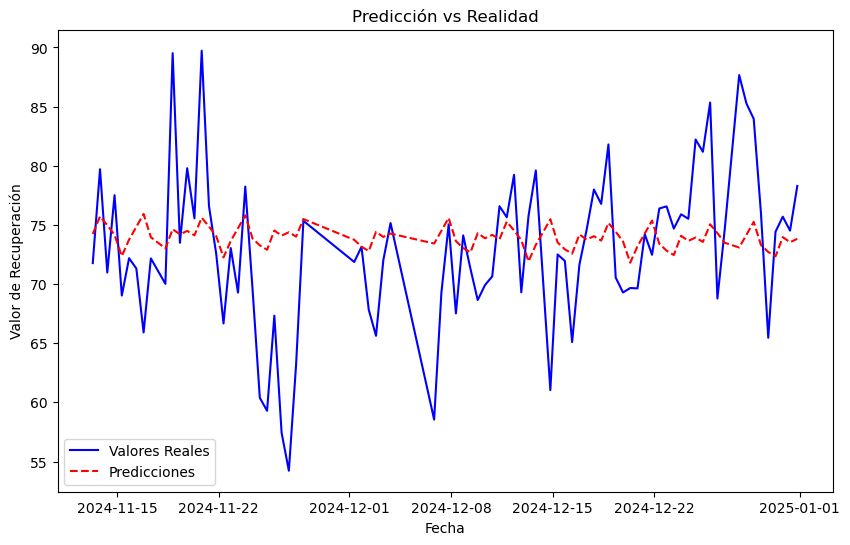

In [286]:
# Paso 6: Visualización de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(df_test_eval.index, y_true, label='Valores Reales', color='blue')
plt.plot(df_test_eval.index, y_pred, label='Predicciones', color='red', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel('Valor de Recuperación')
plt.title('Predicción vs Realidad')
plt.legend()
plt.show()